# ASL Project (Stage Three) 



# **Problem Statement:**
Our project focuses on translating a sign language into an alphabet from (a-z) or number from (0-9) by analyzing hand gestures using a training model.


# **Notebook Content:** 


   

1.  **Training Experiment:**

> Using a Sequential CNN model to train 96913 images and test the model on 24229 images.
> The data collected from three different datasets. All the details of the training are shown in the training and testing part.


2.   **Testing on Static Image**

> This part for retrieving the saved model, and testing the model on a static image to predict the corresponding alphabet or number.



3. **Extracting images from Video Feeds**

> Modifying an open-source code for extracting frames and store selected frames into an array. Extracting the hand from a selected frame, then feed it to the trained model.










**Part 1: Training Experiment**

In [ ]:
import numpy as np
import cv2
import os
import keras
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
working_dir = '/content/drive/My Drive/Computer Vision Project/Datasets'

In [ ]:
cd '$working_dir'

/content/drive/My Drive/Computer Vision Project/Datasets


**Load Data**

In [ ]:
trainingData = './combined'

In [ ]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(categories):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
categories = sorted(os.listdir(trainingData))

images, labels = load_images(directory = trainingData)

**Data Visualization:**
We will show one sample image from each class. The image data labeled by the name of its folder.


Populating the interactive namespace from numpy and matplotlib


C:\Users\harth\AppData\Roaming\Python\Python38\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


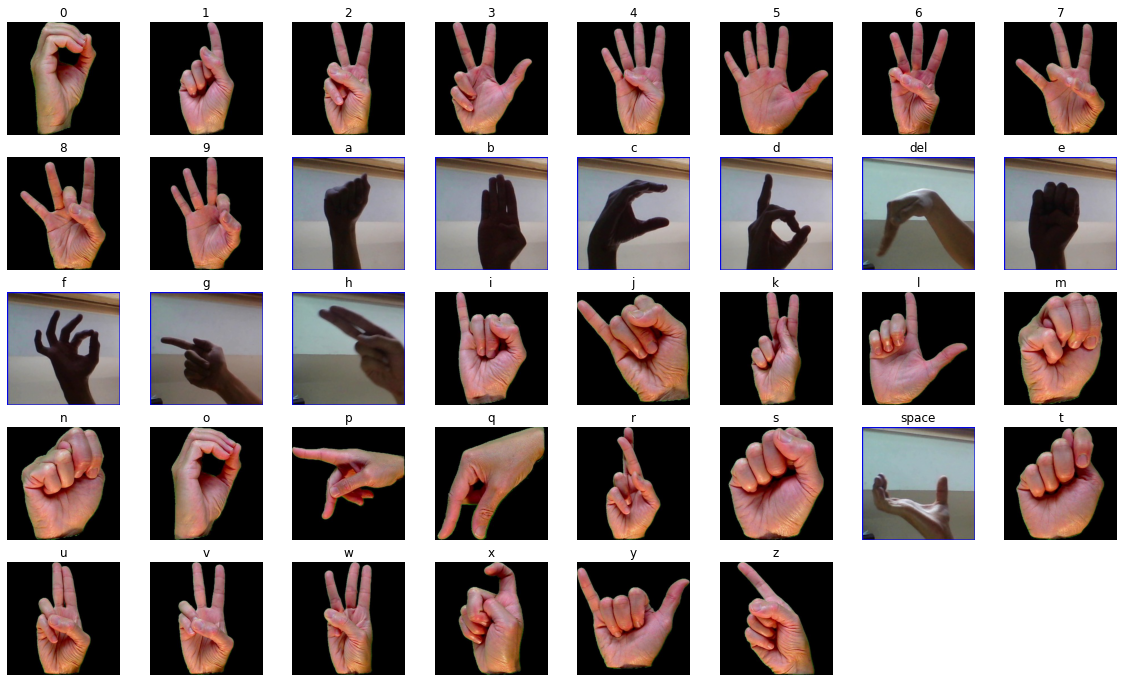

In [ ]:
%pylab inline
import sys
train_images_paths = {}
#loop over all label and store their path in a list 
for label in categories:
    train_images_paths[label] = os.listdir(trainingData + '/' + label)

#show first sample image from each class (categories)
fig = figure(0, (20, 12))
i=0;
for label in categories:
    
    fig.add_subplot(5, 8, i+1)
    
    img = plt.imread(trainingData + '/' + list(train_images_paths.keys())[i] + '/' + list(train_images_paths.values())[i][0]) 
    i=i+1;

    imshow(img)
    title(label)
    axis('off')

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size = 0.2, stratify = labels)

categories_size = len(categories)
train_len = len(xtrain)
test_len = len(xtest)

print("Total number of categories: ", categories_size)
print("Training images: " , train_len)
print("Testing images: ", test_len)


Total number of categories:  38
Training images:  96913
Testing images:  24229


## Data Information:



*   Traning Data - 96913 images
*   Testing Data - 24229 images
*   Number of Clasess - 38 Alphabet (a-z) , Numbers(0-9), space, delete.






**Building a CNN training model**


In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Flatten, Dense, Activation
from tensorflow.keras.layers import Convolution2D , MaxPool2D
from tensorflow.keras import backend as k
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#shuffking and normlize the data
ytrain = keras.utils.to_categorical(ytrain)
ytest = keras.utils.to_categorical(ytest)
xtrain = xtrain.astype('float32')/255.0
xtest = xtest.astype('float32')/255.0

In [ ]:
#### Define layers in the CNN model####
aslmodel = Sequential()
# conv layer 1
aslmodel.add(Convolution2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu',input_shape = (64, 64, 3)))
# conv layer 2
aslmodel.add(Convolution2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
# max pool layer 1
aslmodel.add(MaxPool2D(pool_size = (4, 4)))
# dropout requlrization  
aslmodel.add(Dropout(0.5))
# conv layer 3
aslmodel.add(Convolution2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
# conv layer 4
aslmodel.add(Convolution2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
# max pool layer 2
aslmodel.add(MaxPool2D(pool_size = (4, 4)))
# dropout requlrization
aslmodel.add(Dropout(0.5))
# conv layer 5
aslmodel.add(Convolution2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
# dropout requlrization
aslmodel.add(Dropout(0.5))
# flatten the output of the previous layer 
aslmodel.add(Flatten())
# dense layer
aslmodel.add(Dense(38, activation='softmax'))

aslmodel.summary();


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

In [ ]:
#### compile and fitting the model ####
aslmodel.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

hist = aslmodel.fit(xtrain,ytrain, epochs = 3, batch_size = 64)

Epoch 1/3
1515/1515 [==============================] - 2065s 1s/step - loss: 1.0252 - accuracy: 0.6768
Epoch 2/3
1515/1515 [==============================] - 2058s 1s/step - loss: 0.2851 - accuracy: 0.9086
Epoch 3/3
1515/1515 [==============================] - 2058s 1s/step - loss: 0.1910 - accuracy: 0.9415


**Training Experiments Details:**

*   Root Mean Square Propagation optimizer used to restricts the oscillations  by using a moving average of the squared gradients for each weight. It accelerates the optimization process, so it requires a small number of epoch. 
*   Categorical Cross Entropy used because it measures the performance of the classification model.

*   First training trial is done after 5 epochs, and it did not generalize well, the accuracy on the testing data was around 80%
*   Second training trial is done after 3 epochs, and it generalizes better, the accuracy on the testing data was around 99% as shown below.




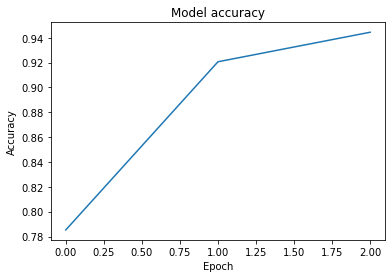

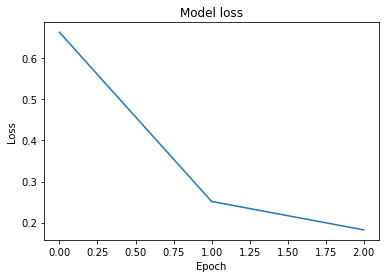

In [ ]:
plt.plot(hist.history['accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()

plt.plot(hist.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
# serialize model to JSON
model_json = aslmodel.to_json()
with open("aslmodel2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
aslmodel.save_weights("aslmodel2.h5")
print("Saved aslmodel2 to disk")

Saved aslmodel2 to disk


In [ ]:
# load json and create model
json_file = open('aslmodel2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("aslmodel2.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

 **Test the model**

In [ ]:
Cost, accuracy = loaded_model.evaluate(xtest,ytest)

print("Cost = ",Cost,"\nAccuracy = ",accuracy)

758/758 [==============================] - 114s 150ms/step - loss: 0.0293 - accuracy: 0.9902
Cost =  0.029504554346203804 
Accuracy =  0.9900532364845276


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = loaded_model.predict(xtest, batch_size = 64, verbose = 0)

In [ ]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks, categories, rotation=45)
    plt.yticks(tick_marks, categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

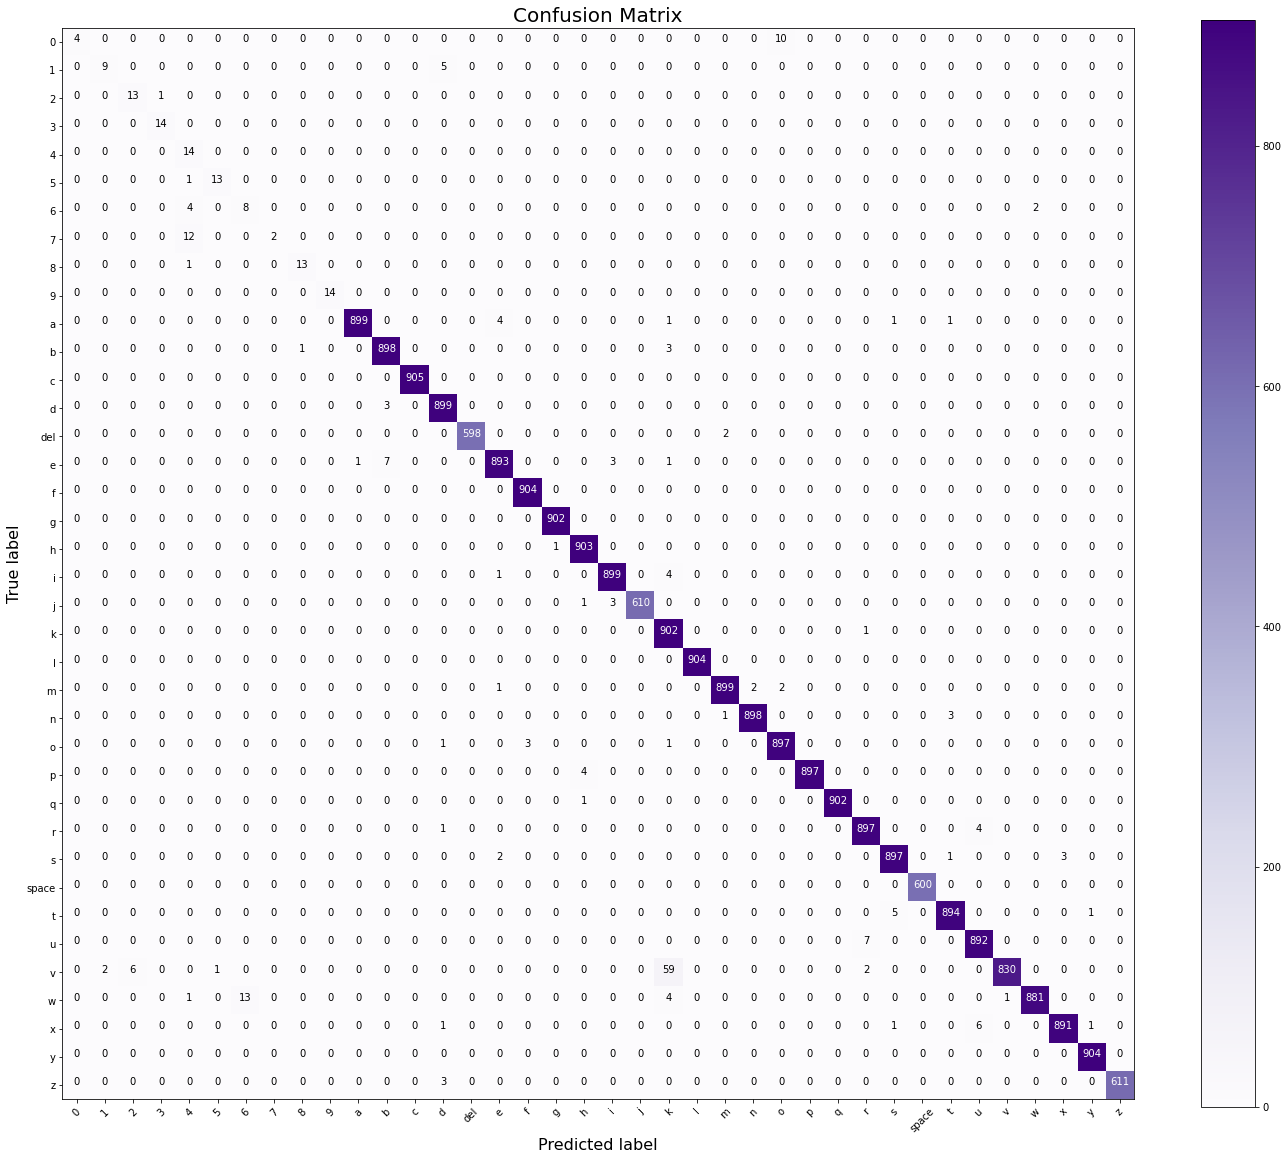

In [ ]:
plot_confusion_matrix(ytest, y_test_pred)

**Part 2: Testing on Static Image:**

In [ ]:
#input: image path
#output: predicted sign (0-9 or a-z, or space,delete)

In [ ]:
working_dir = '/content/drive/My Drive/Computer Vision Project'

In [ ]:
cd '$working_dir'

/content/drive/My Drive/Computer Vision Project


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy as np
import cv2
import os
import keras

In [ ]:
# load json and create model
json_file = open('aslmodel2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("aslmodel2.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
#Compile the loaded model
loaded_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Define the target classes accroding to the same order in the model:
categories =['0','1','2','3','4','5','6','7','8','9','a','b','c','d','del','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','space','t','u','v','w','x','y','z'];

In [ ]:
#reading and normalizing
image =cv2.resize(cv2.imread('Datasets/combined/a'+'/'+'A2.jpg'),(64,64))
imagetest= image.astype('float32')/255.0
imagetest = np.array([imagetest])


Populating the interactive namespace from numpy and matplotlib


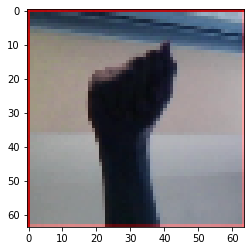

In [ ]:
%pylab inline
imshow(image)

In [ ]:
#prdeict the given hand sign 
y_test_pred = loaded_model.predict(imagetest, batch_size = 64, verbose = 0)

In [ ]:
#map the propaplites to the corresponding sign.
predicted_sign=categories[np.argmax(y_test_pred)]

In [ ]:
predicted_sign

'a'

**Part 3: Extracting images from Video Feeds**

In [ ]:
'''
    Needed libraries
'''
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


'''
  create names for the created images 
  frame_number - what is the number of the frame
  debug - used for extractVideoFrames() debug mode (False for no debugging, True for debugging) (default = False)
  returns "frameXXX" X representing a frame number
'''
def imgNameGen(frame_number, debug = False):
  if debug:
    file_name = "debug_frame" + str(frame_number)
    return file_name
  else:
    file_name = "frame" + str(frame_number)
    return file_name

'''
  Gets the total length of the video using cv2
  returns the video length as a int
'''
def videoLength(video_path):
  capture = cv2.VideoCapture(video_path)
  length = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
  capture.release()
  return length

'''
  Extracts Video frames and saves the created image in the specified save path
     start - where to start capturing frames (default = 0)
     stop - where to stop capturing frames (default = 0)
     frame_step - how many frames are stepped over per run 
     frame_step can also be equal to frames per second to get 1 frame every second to reduce
     data production size (frame_step - 1 = frames_skipped) (default = 1)
     save_path - where to save the created images
     video_path - where to locate the video
     debug - this is for testing only (False for no debugging, True for debugging) (default = False)
     returns -1 if proccess failed
'''
def extractVideoFrames(video_path, save_path, start=0, stop=0, frame_step = 1, debug = False):
  length = videoLength(video_path)
  # if no value is for start and stop specified then extract all frames from video
  # else use values given

  if start == 0 and stop == 0:
    stop = length
  elif start > stop:
    # if we catch that the start value is greater than stop set start == stop
    stop = start
    # to be safe check if these values are out of bounds
    if (start < 0 or stop < 0) or (start > length or stop > length):
       # if we catch that start and stop are out of bounds use default behavior
       start = 0
       stop = length
  elif (start < 0 or stop < 0) or (start > length or stop > length):
    # if we catch that start and stop are out of bounds use default behavior
    start = 0
    stop = length
    # check if frame_step is valid
  elif frame_step > length:
    print("Error, frame_step exceeds video length!")
    return -1
  elif frame_step <= 0:
    print("Fatal Error, cannot step over 0 or negative steps!")
    return -1
  #check to make sure that video is a video (video's should have more than 0 frames else send error)
  if length == 0:
    print("Error, specified video has insufficent frames to continue!")
    return -1
  
  #get video capture
  capture = cv2.VideoCapture(video_path)

  #get the file name without extenstion

  ignore_path, file_name = os.path.split(video_path)
  name_of_video = os.path.splitext(file_name)[0]
  '''
    Test Code comment out after testing
  '''

  # test to see if we can get frames
  # isAFrame - boolean that states that we successful got a frame
  # Frame - the frame from the video we got
  if debug:
    isAFrame, Frame = capture.read()
    if isAFrame:
      print("Successfuly read a frame from video")
      frame_count = 1
      test_path = os.path.join(save_path, name_of_video + '_{}.jpg'.format(imgNameGen(frame_count, debug)))
      cv2.imwrite(test_path,Frame)
      # test to see if we successfuly created a file
      if os.path.isfile(test_path):
        print("File creation successfull")
      else:
        print("File creation failed")
        return -1
    else:
      print("Error, did not get a frame from video")
      return -1
  else:
  # lets create images from the video
    isFrame = True
    frame_count = 0
    while isFrame:
      isFrame, Frame = capture.read()
      if isFrame and (frame_count >= start and frame_count <= stop) and frame_count % frame_step == 0:
        cv2.imwrite(os.path.join(save_path, name_of_video + '_{}.jpg'.format(imgNameGen(frame_count))),Frame)
        frame_count += 1
      else:
        frame_count +=1
  capture.release()
  return 0

'''
  Extracts Video frames and puts created image in a array
     start - where to start capturing frames (default = 0)
     stop - where to stop capturing frames (default = 0)
     frame_step - how many frames are stepped over per run 
     frame_step can also be equal to frames per second to get 1 frame every second to reduce
     data production size (frame_step - 1 = frames_skipped) (default = 1)
     video_path - where to locate the video
     debug - this is for testing only (False for no debugging, True for debugging) (default = False)
     returns -1 if proccess failed, returns an array of images
'''
def extractVideoFramesToArray(video_path, start=0, stop=5, frame_step = 1, debug = False):
  length = videoLength(video_path)
  # if no value is for start and stop specified then extract all frames from video
  # else use values given

  if start == 0 and stop == 0:
    stop = length
  elif start > stop:
    # if we catch that the start value is greater than stop set start == stop
    stop = start
    # to be safe check if these values are out of bounds
    if (start < 0 or stop < 0) or (start > length or stop > length):
       # if we catch that start and stop are out of bounds use default behavior
       start = 0
       stop = length
  elif (start < 0 or stop < 0) or (start > length or stop > length):
    # if we catch that start and stop are out of bounds use default behavior
    start = 0
    stop = length
    # check if frame_step is valid
  elif frame_step > length:
    print("Error, frame_step exceeds video length!")
    return -1
  elif frame_step <= 0:
    print("Fatal Error, cannot step over 0 or negative steps!")
    return -1
  #check to make sure that video is a video (video's should have more than 0 frames else send error)
  if length == 0:
    print("Error, specified video has insufficent frames to continue!")
    return -1
  
  #get video capture
  capture = cv2.VideoCapture(video_path)

  #get the file name without extenstion

  ignore_path, file_name = os.path.split(video_path)
  name_of_video = os.path.splitext(file_name)[0]
  '''
    Test Code comment out after testing
  '''

  # test to see if we can get frames
  # isAFrame - boolean that states that we successful got a frame
  # Frame - the frame from the video we got
  if debug:
    isAFrame, Frame = capture.read()
    test_array = []
    if isAFrame:
      print("Successfuly read a frame from video")
      frame_count = 1
      test_array.append(Frame)
      # test to see if we successfuly created a file
      return test_array
    else:
      print("Error, did not get a frame from video")
      return -1
  else:
  # lets create images from the video
    isFrame = True
    frame_count = 0
    image_array = []
    while isFrame:
      isFrame, Frame = capture.read()
      if isFrame and (frame_count >= start and frame_count <= stop) and frame_count % frame_step == 0:
        image_array.append(Frame)
        frame_count += 1
      else:
        frame_count +=1
  capture.release()
  return image_array



In [ ]:
#video directory
video_dir = '/content/drive/My Drive/Computer Vision Project/1111.mp4'

In [ ]:
#Testing (frames extraction)
images = extractVideoFramesToArray(video_dir, start=28, stop=1160, frame_step = 29, debug = False)
if type(images) != list:
   print("method failed")
else:
  print(images[0].shape)

(360, 540, 3)


**Showing the first selected frame**
* Assumption: the hand in a static position, and located on the left.
* Note: the video contains a presentation only of the alphabet from a to z. The duration is 40 second. One alphabet per second.

link: https://www.youtube.com/watch?v=3ILNmxK1hOo

Populating the interactive namespace from numpy and matplotlib


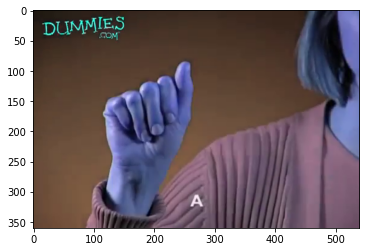

In [ ]:
#show first selected frame
%pylab inline
import sys
imshow(images[0])

**Get the hand images from the images array**

In [ ]:
import cv2 as cv
%pylab inline
import sys
hands =[]
for i in range(0,27):
  img = images[i];
  crop_img=img[20:350,50:400];
  resized_img =cv.resize(crop_img ,(64,64)) 
  hands.append(resized_img)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
len(hands)

27

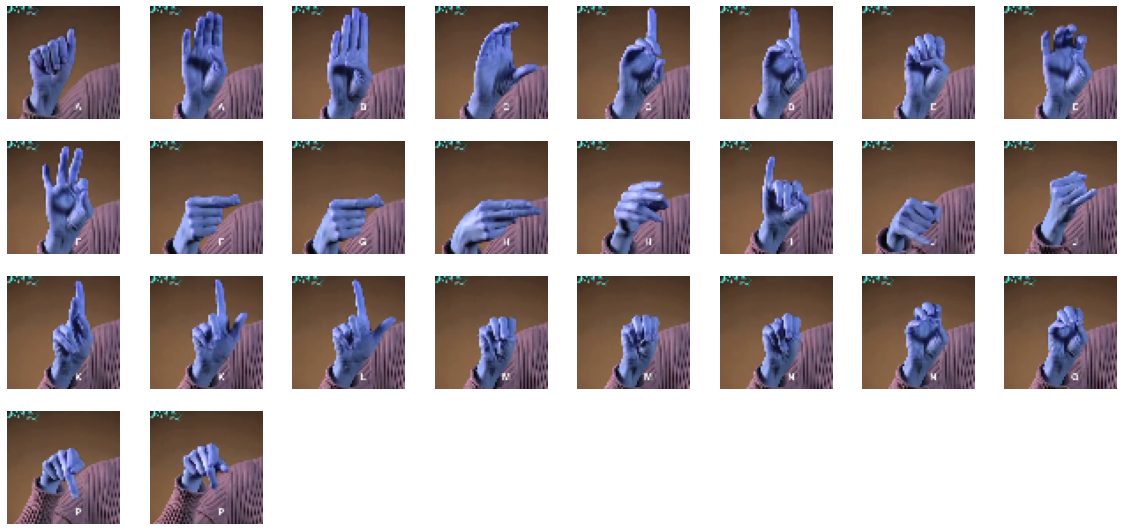

In [ ]:
# show all the hand images before prediction
fig = figure(0, (20, 12))
k=0
for i in range(0,26):
    
    fig.add_subplot(5, 8, k+1)
    
    img =hands[i]
    k=k+1
    imshow(img)
    axis('off')

**Experiment of feeding the images above to the trained model**

The results were not very accurate, unfortunately.

In [ ]:
#normalizing
for i in range(len(hands)):
  hands[i] = hands[i]/255.

In [ ]:
#prdeict the given hand sign 
probabilities=[];
for i in range(len(hands)):
  y_test_pred = loaded_model.predict(np.array([hands[i]]), batch_size = 64, verbose = 0)
  probabilities.append(y_test_pred);
  

In [ ]:
#Map the propaplites to the corresponding sign.
predicted_sign=[]
for i in range(len(hands)):
  predicted_=categories[np.argmax(probabilities[i])]
  predicted_sign.append(predicted_)

In [ ]:
predicted_sign

['m',
 'b',
 'b',
 'n',
 'd',
 'd',
 'e',
 'i',
 'b',
 'z',
 'del',
 'q',
 'p',
 'i',
 'p',
 's',
 'r',
 'd',
 'd',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm']